In [2]:
%%html
<style type="text/css">
  span.ecb { background: yellow; }
</style>

<span class="ecb">Grading comments by ECB will be highlighted like this.</span>
<span class="ecb"></span>

# ATMO 5331 - Homework 1 - Fall 2023
## Due 10 Sep 2023, 11:59 pm.

When doing this homework, remember that you have two jobs:
1. Make it work.
2. Clean it up so that I can understand what you've done. If you think I might not undersand, document it with a comment or a function docstring.

You should present your work with a clear logical progression. If that seems like a hassle, remember that in doing so you are practicing skills that are expected in your thesis and journal publications.

You may work alone or in groups of up to 3. I will not be adjudicating relative level of effort in group work, so you are responsible for ensuring there is an even contribution by your partner.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import numpy as np

mcom_lon, mcom_lat = -101.8803718553, 33.5818617015
mcom_alt = 957.179


**1.** Create the 1D arrays `lon` and `lat`, centered on MCOM and incrementing by 5 degrees. There should be 7 longitude and 5 latitude values. (10 pts.)

The sample code also includes data array `d` with the shape (`nlat`, `nlon`), and defines some values so that we all have the same dataset. A plot of the data array in index coordintes is also included.

Together these arrays define the grid cell center locations and corresponding data values.

[-116.8803718553, -111.8803718553, -106.8803718553, -101.8803718553, -96.8803718553, -91.8803718553, -86.8803718553]
[23.5818617015, 28.5818617015, 33.5818617015, 38.5818617015, 43.5818617015]


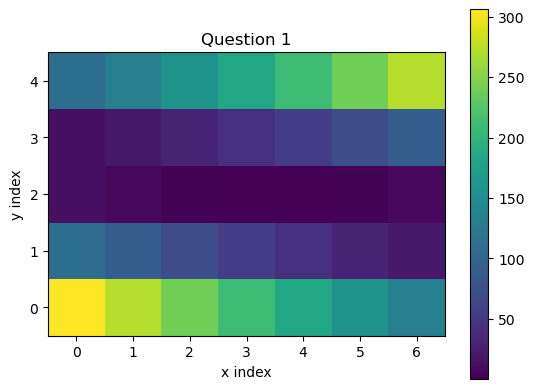

In [5]:
nlon = 7
nlat = 5
dlon, dlat = 5.0, 5.0

d = (np.arange(nlon*nlat) - (nlon*nlat/2.0))**2.0
d.shape = (nlat, nlon)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(d, origin='lower')
plt.colorbar(im)
plt.title("Question 1")
ax.set_xlabel('x index')
ax.set_ylabel('y index')
lon = ([-116.8803718553, -111.8803718553, -106.8803718553, -101.8803718553, -96.8803718553, -91.8803718553, -86.8803718553])
lat = ([23.5818617015, 28.5818617015, 33.5818617015, 38.5818617015, 43.5818617015])

print(lon)
print(lat)

**2.** Since the image is regularly gridded in lon/lat We can use the `extent` keyword argument to `imshow` to specify the bounds of the image, as you see below. Is this plot correct or incorrect? Explain how the `extent` keyword argument works using the language of centers, edges, and nodes. (10 pts.) 

`print(ax.axis())` might be useful in understanding what you are seeing.

(-116.8803718553, -86.8803718553, 23.5818617015, 43.5818617015)


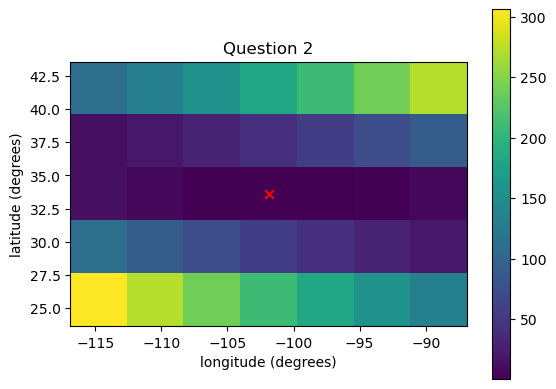

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

im = ax.imshow(d, origin='lower', extent=(min(lon), max(lon), min(lat), max(lat)))
plt.colorbar(im)
ax.scatter(mcom_lon, mcom_lat, marker='x', color='red')
plt.title("Question 2")
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')
print(ax.axis())

ANSWER: "Extent" is used while creating plots, images, or charts. It helps add specific bounds to the plot. The keyword has properties that allow the user to enter values to set as edges, like the x and y axis min and maxs. Next, extent can create nodes in overlapping edges, like the lower left corner node being y min and x min overlap. Centers are able to be found using the midpoints between 4 nodes. 

**3.** Write a function that converts 1D center positions to edge positions. The function should calculate the grid spacing using only the information in the variable `x`. Use the closest adjacent spacing to extend the start and end of the array. Use this function to create two arrays `lat_edge` and `lon_edge` and print their values. Is the new figure created with `imshow` correct? Explain your answer. (20 pts.)

[-119.3803718553, -114.3803718553, -109.3803718553, -104.3803718553, -99.3803718553, -94.3803718553, -89.3803718553, -84.3803718553]
[21.0818617015, 26.0818617015, 31.081861701500003, 36.0818617015, 41.0818617015, 46.0818617015]


Text(0, 0.5, 'latitude (degrees)')

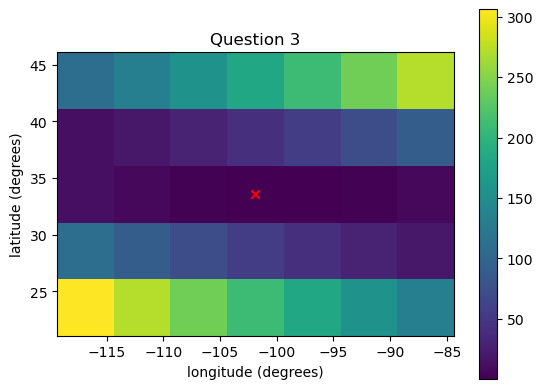

In [7]:
def centers_to_edges_1d(x):
    #making sure there is two centers
    if len(x) < 2:
        raise ValueError()
    #space is the distance between near centers using min to find the minimum spacing between centers
    space = min(x[i + 1] - x[i] for i in range(len(x) - 1))
    #takes the space and divids into 2 for the midpoint of the centers
    edge_pos = [x[0] - space / 2]
    #loop that takes 2 centers and averages them for the edges
    for i in range(len(x) - 1):
        edges = (x[i] + x[i + 1]) / 2
        edge_pos.append(edges)
    #adds to the last center to find the edge
    edge_pos.append(x[-1] + space / 2)
    return edge_pos
lon_edge = centers_to_edges_1d(lon)
lat_edge = centers_to_edges_1d(lat)
print(lon_edge)
print(lat_edge)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(d, origin='lower', extent=(min(lon_edge), max(lon_edge), min(lat_edge), max(lat_edge)))
plt.colorbar(im)
plt.title("Question 3")

ax.scatter(mcom_lon, mcom_lat, marker='x', color='red')
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')

**4.** `imshow` works for the data so far because we have a regular grid with even spacing, so we only need to specify the corners. For a more general quadrilateral mesh, we can use `pcolormesh` to create a similar plot. What, if anything, is different about these plots compared to the first two? (10 pts.)

Text(0, 0.5, 'latitude (degrees)')

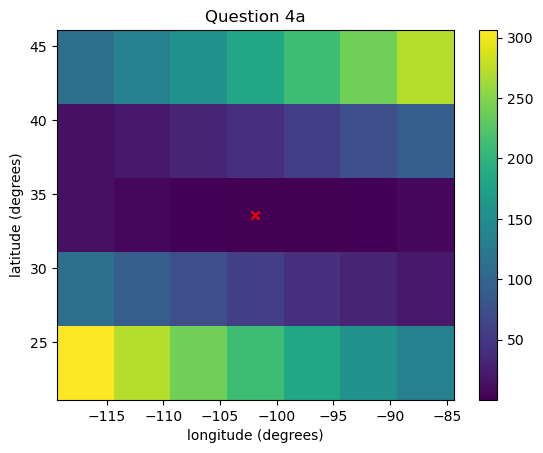

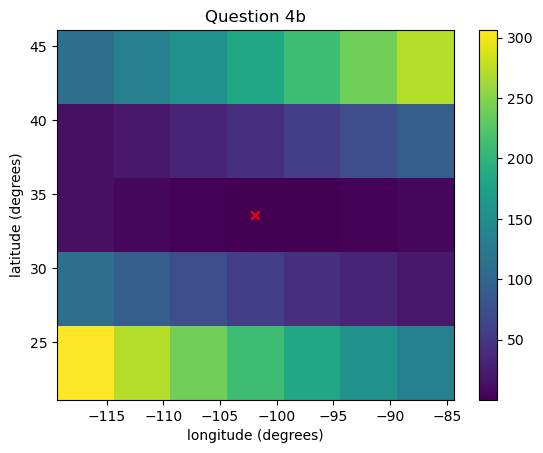

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.pcolormesh(lon, lat, d)
plt.colorbar(im)
plt.title("Question 4a")
ax.scatter(mcom_lon, mcom_lat, marker='x', color='red')
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')


fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.pcolormesh(lon_edge, lat_edge, d)
plt.colorbar(im)
plt.title("Question 4b")
ax.scatter(mcom_lon, mcom_lat, marker='x', color='red')
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')

ANSWER: I don't see anything different between the two graphs, nothing is different besides graph A uses the lat,lon variables and graph B uses lat_edge.

**5.** So far, you have used 1D coordinate arrays, and things worked fine because the data were regularly gridded. `pcolormesh` will also accept 2D coordinate arrays. The function `np.meshgrid` creates 2D arrays from 1D arrays. Use `meshgrid` to create these 2D coordinate arrays and use them to make a plot of the data using `pcolormesh`. It should match the correct plot(s) above (20 pts.).

In [9]:
lonm, latm = np.meshgrid(lon, lat)


ax.pcolormesh?

Signature:
ax.pcolormesh(
    *args,
    alpha=None,
    norm=None,
    cmap=None,
    vmin=None,
    vmax=None,
    shading=None,
    antialiased=False,
    data=None,
    **kwargs,
)
Docstring:
Create a pseudocolor plot with a non-regular rectangular grid.

Call signature::

    pcolormesh([X, Y,] C, **kwargs)

*X* and *Y* can be used to specify the corners of the quadrilaterals.

.. hint::

   `~.Axes.pcolormesh` is similar to `~.Axes.pcolor`. It is much faster
   and preferred in most cases. For a detailed discussion on the
   differences see :ref:`Differences between pcolor() and pcolormesh()
   <differences-pcolor-pcolormesh>`.

Parameters
----------
C : array-like
    The mesh data. Supported array shapes are:

    - (M, N) or M*N: a mesh with scalar data. The values are mapped to
      colors using normalization and a colormap. See parameters *norm*,
      *cmap*, *vmin*, *vmax*.
    - (M, N, 3): an image with RGB values (0-1 float or 0-255 int).
    - (M, N, 4): an image with 

[[3.0625e+02 2.7225e+02 2.4025e+02 2.1025e+02 1.8225e+02 1.5625e+02
  1.3225e+02]
 [1.1025e+02 9.0250e+01 7.2250e+01 5.6250e+01 4.2250e+01 3.0250e+01
  2.0250e+01]
 [1.2250e+01 6.2500e+00 2.2500e+00 2.5000e-01 2.5000e-01 2.2500e+00
  6.2500e+00]
 [1.2250e+01 2.0250e+01 3.0250e+01 4.2250e+01 5.6250e+01 7.2250e+01
  9.0250e+01]
 [1.1025e+02 1.3225e+02 1.5625e+02 1.8225e+02 2.1025e+02 2.4025e+02
  2.7225e+02]]
[21.0818617015, 26.0818617015, 31.081861701500003, 36.0818617015, 41.0818617015, 46.0818617015]
[-119.3803718553, -114.3803718553, -109.3803718553, -104.3803718553, -99.3803718553, -94.3803718553, -89.3803718553, -84.3803718553]


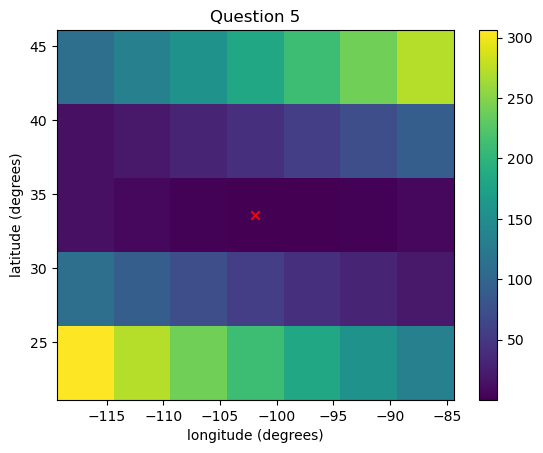

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.pcolormesh(lon, lat, d)
plt.colorbar(im)
plt.title("Question 5")
ax.scatter(mcom_lon, mcom_lat, marker='x', color='red')
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')
lon_edge_2d = centers_to_edges_1d(lon)
lat_edge_2d = centers_to_edges_1d(lat)
print(d)
print(lat_edge_2d)
print(lon_edge_2d)
